# UEDS

In [1]:
import os, sys, numpy as np
path = os.getcwd()+"/../.."
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!

In [2]:
tmp_figure_out = os.getcwd()+"/in_progress/out_put"

In [3]:
import Ensembler
from Ensembler.src.potentials import OneD as pot
from Ensembler import visualisation as vis

from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
#Potential
end_states = [pot.harmonicOsc(x_shift=1, fc=9000), pot.harmonicOsc(x_shift=1.5, fc=9000)]
eds_potential = pot.envelopedPotential(V_is=end_states, s=1)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


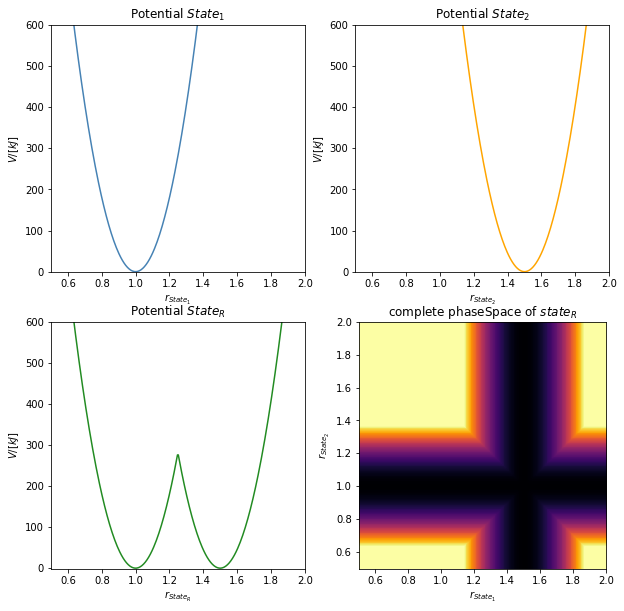

In [5]:
positions = np.linspace(0.5,2,300)
fig, ax = vis.plotPotentials.plot_envelopedPotential_2State_System(eds_potential=eds_potential, positions=positions, s_value=0.5)
fig.savefig(tmp_figure_out+"/test_eds_pot.png")

In [6]:
#integrator
integrator = Ensembler.integrator.metropolisMonteCarloIntegrator()
#System
system = Ensembler.system.system(potential=eds_potential, integrator=integrator)

In [7]:
#set Starting Position
system.set_position([[0.4], [2.1]])
system.set_position([[0.8], [1.8]])

system.getCurrentState()

State(position=array([[0.8],
       [1.8]]), temperature=298.0, totEnergy=179.99999999999991, totPotEnergy=179.99999999999991, totKinEnergy=nan, dhdpos=nan, velocity=nan)

In [23]:
system.simulate(2000, withdrawTraj=True)

Progress: 	0%	10%	20%	30%	40%	50%	60%	70%	80%	90%	100%


State(position=array([[1.00264447],
       [2.00264447]]), temperature=298.0, totEnergy=0.03146944226264355, totPotEnergy=0.03146944226264355, totKinEnergy=nan, dhdpos=0.000694790996525918, velocity=None)

In [9]:
from Ensembler import visualisation as vis


In [25]:
del traj
traj = system.getTrajectory()
traj.columns, traj.shape

(Index(['position', 'temperature', 'totEnergy', 'totPotEnergy', 'totKinEnergy',
        'dhdpos', 'velocity'],
       dtype='object'), (2000, 7))

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline

def plotting_1D2State_eds_pot_simulation(system, x_range=None, y_range=None):
    traj = system.getTrajectory()
    eds_potential = system.potential
    
    y_range = [0,2.5]
    x_range= [0,2.5]
    positions = np.linspace(0,2.5,300)
    positions1 = list(map(lambda x: x[0],traj.position))
    positions2 = list(map(lambda x: x[1],traj.position))
    enes1 = eds_potential.V_is[0].ene(np.array(list(map(lambda x: x[0], traj.position))).flat)
    enes2 = eds_potential.V_is[1].ene(np.array(list(map(lambda x: x[1], traj.position))).flat)
    enesR = eds_potential.ene(list(map(lambda x: x, traj.position)))
    fig, ax = vis.plotPotentials.plot_envelopedPotential_2State_System(eds_potential=eds_potential, positions=positions, s_value=0.5)
    
    ax[0].scatter(positions1, enes1)
    ax[0].scatter(positions1[-1], enes1[-1], color="r")
    ax[0].scatter(positions1[0], enes1[0], color="g")

    ax[1].scatter(positions2, enes2)
    ax[1].scatter(positions2[-1], enes2[-1], color="r")
    ax[1].scatter(positions2[0], enes2[0], color="g")

    ax[2].scatter(positions1, enesR)
    ax[2].scatter(positions2, enesR)
    ax[2].scatter(positions1[-1], enesR[-1], color="r")
    ax[2].scatter(positions1[0],  enesR[0], color="g")
    
    ax[-1].scatter(positions2, positions1, alpha=0.4)
    ax[-1].scatter(positions2[-1], positions1[-1], color="r")
    ax[-1].scatter(positions2[0], positions1[0], color="g")

    for x in ax:
        x.set_xlim(x_range)
        
    ax[-1].set_ylim(y_range)
    
    fig.show()

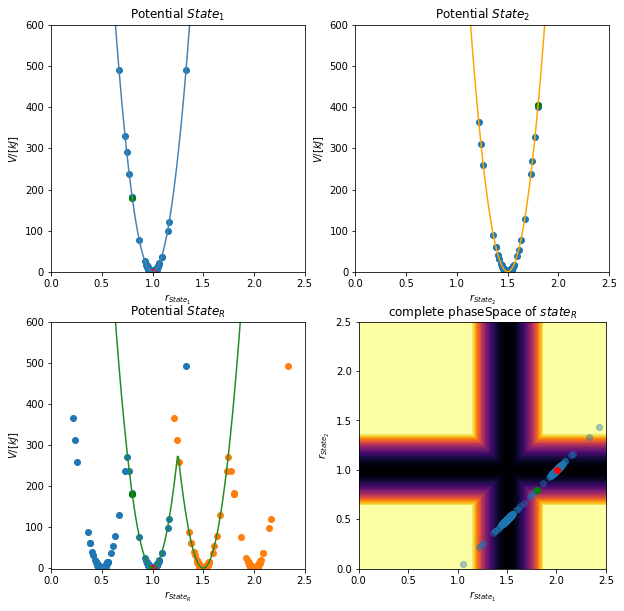

In [29]:
plotting_1D2State_eds_pot_simulation(system)

In [18]:
traj

,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity
0,"[[0.8], [1.8]]",298.0,180.000000,180.000000,NaN,NaN,"[0.5645969281081972, 1.0089347372146067]"
1,"[[0.47879836487079186], [1.4787983648707919]]",298.0,2.022792,2.022792,NaN,-0.321202,None
2,"[[0.9867198226695074], [1.9867198226695075]]",298.0,0.793634,0.793634,NaN,0.507921,None
3,"[[0.4880060795531709], [1.488006079553171]]",298.0,0.647344,0.647344,NaN,-0.498714,None
4,"[[0.9819066783145959], [1.981906678314596]]",298.0,1.473157,1.473157,NaN,0.493901,None
5,"[[0.9903116136304994], [1.9903116136304995]]",298.0,0.422392,0.422392,NaN,0.008405,None
6,"[[0.48611756271529694], [1.4861175627152972]]",298.0,0.867249,0.867249,NaN,-0.504194,None
7,"[[0.5127570564929584], [1.5127570564929587]]",298.0,0.732341,0.732341,NaN,0.026639,None
8,"[[0.523031539030811], [1.5230315390308111]]",298.0,2.387033,2.387033,NaN,0.010274,None
9,"[[0.9659065569182622], [1.9659065569182623]]",298.0,5.230633,5.230633,NaN,0.442875,None
